In [ ]:
import shap
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

/Users/shubhamagarwal/Desktop/untitled folder/shap-exp/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from shap.datasets import iris

In [3]:
x, y = iris(display=True)

In [4]:
x

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [5]:
y

['setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',


In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,stratify=y, random_state=42)

In [8]:
y_train

['setosa',
 'virginica',
 'versicolor',
 'setosa',
 'versicolor',
 'virginica',
 'versicolor',
 'virginica',
 'virginica',
 'virginica',
 'virginica',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'setosa',
 'setosa',
 'virginica',
 'virginica',
 'setosa',
 'versicolor',
 'setosa',
 'virginica',
 'setosa',
 'versicolor',
 'virginica',
 'virginica',
 'setosa',
 'virginica',
 'setosa',
 'setosa',
 'versicolor',
 'versicolor',
 'setosa',
 'virginica',
 'virginica',
 'versicolor',
 'versicolor',
 'virginica',
 'versicolor',
 'setosa',
 'versicolor',
 'setosa',
 'virginica',
 'setosa',
 'setosa',
 'virginica',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'versicolor',
 'virginica',
 'versicolor',
 'setosa',
 'virginica',
 'versicolor',
 'virginica',
 'setosa',
 'virginica',
 'setosa',
 'versicolor',
 'virginica',
 'setosa',
 'versicolor',
 'versicolor',
 'virginica',
 'versicolor',
 'versicolor',
 'virginica',
 'setosa',
 'setosa',
 'setosa',
 'virginica',
 'versicolor',
 'vi

In [9]:
le=LabelEncoder()
y_train=le.fit_transform(y_train)
y_test=le.transform(y_test)

In [10]:
rf=RandomForestClassifier(n_estimators=10, random_state=42,max_depth=4)

rf.fit(x_train, y_train)

,n_estimators,10
,criterion,'gini'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [16]:
rf.predict(x_test)

array([0, 2, 1, 1, 0, 1, 0, 0, 2, 1, 2, 2, 2, 1, 0, 0, 0, 1, 1, 2, 0, 2,
       1, 1, 2, 2, 1, 0, 2, 0])

In [12]:
y_train_pred=rf.predict(x_train)
y_test_pred=rf.predict(x_test)

In [14]:
print(accuracy_score(y_train, y_train_pred))
print(accuracy_score(y_test, y_test_pred))

0.9916666666666667
0.9333333333333333


In [17]:
explainer=shap.TreeExplainer(model=rf,data=x_train,model_output='probability')

In [19]:
explainer.expected_value

array([0.32      , 0.30865148, 0.37134852])

In [ ]:
rf.predict_proba(x_train).mean(axis0)

array([0.33333333, 0.33104281, 0.33562385])

In [22]:
test_case=x_test.iloc[:1,:]

In [23]:
prediction_prob=rf.predict_proba(test_case)

In [31]:
prediction_prob

array([[1., 0., 0.]])

In [26]:
shap_value=explainer(test_case)

In [27]:
shap_value

.values =
array([[[ 0.03716667, -0.06884741,  0.03168074],
        [-0.0005    ,  0.00160748, -0.00110749],
        [ 0.33066667, -0.16295895, -0.16770772],
        [ 0.31266667, -0.08045262, -0.23221406]]])

.base_values =
array([[0.32      , 0.30865148, 0.37134852]])

.data =
array([[4.4, 3. , 1.3, 0.2]])

In [28]:
shap_value[0,:,0]

.values =
array([ 0.03716667, -0.0005    ,  0.33066667,  0.31266667])

.base_values =
np.float64(0.31999999999999995)

.data =
array([4.4, 3. , 1.3, 0.2])

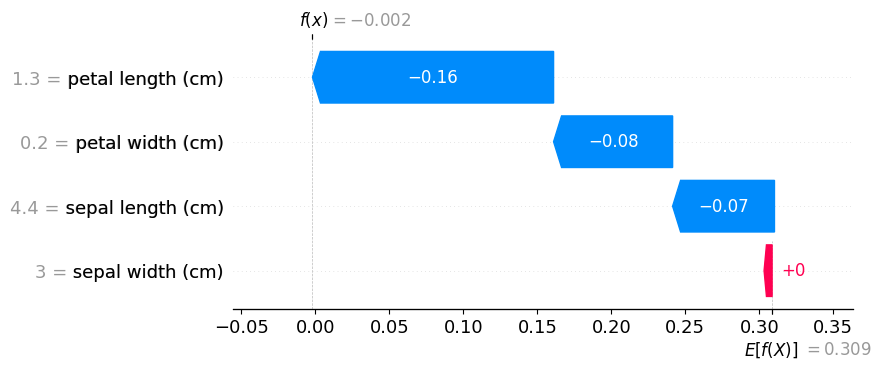

In [33]:
shap.waterfall_plot(shap_value[0,:,1],max_display=4)